**Import necessary libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [4]:
# Load dataset
df = pd.read_csv("/content/heart_disease.csv")

# **01) Data Cleaning**

## **1.1 Identify Missing Values**

In [5]:
# === Before cleaning ===
print("Total rows:", df.shape[0])
print(df['Heart Disease Status'].value_counts())
print("Null values per column:\n", df.isnull().sum())

Total rows: 10000
Heart Disease Status
No     8000
Yes    2000
Name: count, dtype: int64
Null values per column:
 Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64


## **1.2 Remove Null Values**

In [6]:
before_rows = df.shape[0]
df = df.dropna()
after_rows = df.shape[0]

print("Total rows:", after_rows)
print(df['Heart Disease Status'].value_counts())
print(f"Removed {before_rows - after_rows} rows containing null values.")

Total rows: 7067
Heart Disease Status
No     5632
Yes    1435
Name: count, dtype: int64
Removed 2933 rows containing null values.


## **1.3 Balance Dataset**

In [7]:
# 1.2 Balance Dataset
df_yes = df[df['Heart Disease Status'] == "Yes"]
df_no = df[df['Heart Disease Status'] == "No"]

# Match 'No' count to 'Yes' count
df_no_sampled = df_no.sample(n=len(df_yes), random_state=42)

# Combine both classes
df_balanced = pd.concat([df_yes, df_no_sampled])

# Shuffle dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Final balance check
print("\n=== After balancing ===")
print(df_balanced['Heart Disease Status'].value_counts())



=== After balancing ===
Heart Disease Status
Yes    1435
No     1435
Name: count, dtype: int64


## **1.4 Detecting the Duplicates**

In [ ]:
duplicated_rows_df_balanced = df_balanced[df_balanced.duplicated()]
print("Number of Duplicated Rows: ",duplicated_rows_df_balanced.shape)

Number of Duplicated Rows:  (0, 21)


In [ ]:
df_balanced.shape

(2870, 21)

In [ ]:
df_balanced.count()

,0
Age,2870
Gender,2870
Blood Pressure,2870
Cholesterol Level,2870
Exercise Habits,2870
Smoking,2870
Family Heart Disease,2870
Diabetes,2870
BMI,2870
High Blood Pressure,2870


## **1.5 Visualizing Target Class Balance Before & After Cleaning**

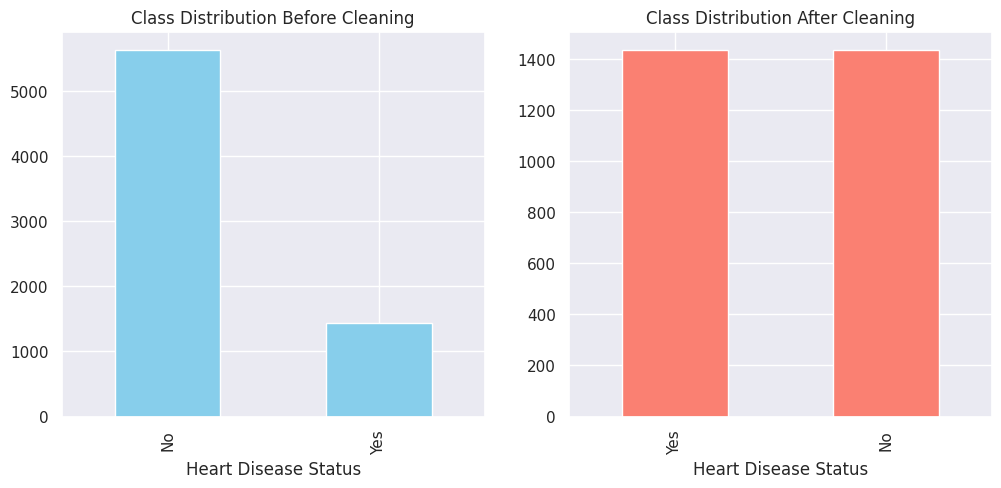

In [9]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
df['Heart Disease Status'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Class Distribution Before Cleaning")

plt.subplot(1,2,2)
df_balanced['Heart Disease Status'].value_counts().plot(kind='bar', color='salmon')
plt.title("Class Distribution After Cleaning")

plt.show()
